# Описание проекта
**Краткое описание:** в крупном интернет-магазине, совместно с отделом маркетинга подготовлен список из 9 гипотез для увеличения выручки.

**Цель:** необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание данных:**

hypothesis.csv:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

orders.csv:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

visitors.csv:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**План работы:**

Приоритизировать гипотезы:
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Проанализировать, сделать выводы.

Проанализиравть A/B-тест:
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
* Проанализировать, сделать выводы. Принять одно из решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Приоритизация гипотез
Чтобы не тратить ресурсы на проверку всех гипотез, выполняется приоритизация имеющихся гипотез с использованием метода ICE.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import warnings # конвертеры, которые позволяют использовать типы pandas в matplotlib

In [2]:
# Открытие файлов
hypothesis = pd.read_csv('/datasets/hypothesis.csv') # гипотезы
orders = pd.read_csv('/datasets/orders.csv') # заказы
visitors = pd.read_csv('/datasets/visitors.csv') # посетители
    
# Снятие ограничений на отражение максимального коливества столбцов и символов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Переименование столбцов в соответствии со стилем Python (приведение к нижнему регистру)
hypothesis.columns = hypothesis.columns.str.lower()

# Вывод таблицы hypothesis
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Информация о hypothesis:**
* `hypothesis` — краткое описание гипотезы;
* `reach` — охват пользователей по 10-балльной шкале;
* `impact` — влияние на пользователей по 10-балльной шкале;
* `confidence` — уверенность в гипотезе по 10-балльной шкале;
* `efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение efforts, тем дороже проверка гипотезы.

### ICE score
(от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

ICE score = Impact * Confidence * Ease = Impact * Confidence / Effort

In [3]:
# Расчет ICE score для гипотез в отдельном столбце таблицы hypothesis
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

# Вывод гипотез в порядке убывания ICE score
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:** наиболее перспективные гипотезы по ICE:
* 8 - Запустить акцию, дающую скидку на товар в день рождения;
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### RICE score
(R от англ. reach, «охват») - модификация метода ICE.

RICE score = Reach * Impact * Confidence / Effort

In [4]:
# Расчет RICE score для гипотез в отдельном столбце таблицы hypothesis
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# Вывод гипотез в порядке убывания RICE score
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** наиболее перспективные гипотезы по RICE:
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

При применении метода RICE гипотеза №7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) стала на первом месте, т.к. ее охват значительно больше, чем у остальных гипотез. Гипотеза №8 (Запустить акцию, дающую скидку на товар в день рождения) имеет наименьший охват, поэтому в методике RICE не является лидирующей в отличии от ICE.

### Вывод
Из имеющего перечня гипотез наиболее перспективными являются:
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (`наибольший охват`);
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (`наибольшее влияние`).

## A/B-тест
Проведен A/B-тест, результаты представлены в загруженных ранее датафреймах orders и visitors. Необходимо выполнить анализ A/B-теста.

### Подготовка данных

In [5]:
# Вывод информации о датафрейме с заказами и первых 5 строк
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# Вывод информации о датафрейме с посетителями и первых 5 строк
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# Проверка датафреймов на наличие дубликатов
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

In [8]:
# Переименование столбцов датафрейма orders в соответствии со стилем Python
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.head(0)

,transaction_id,visitor_id,date,revenue,group


In [9]:
# Приведение столбцов с датами к формату datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Информация о orders:**
* `transaction_id` — идентификатор заказа;
* `visitor_id` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

**Информация о visitors:**
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [10]:
# Уникальные значения по группам
visitors['group'].sort_values().unique()

array(['A', 'B'], dtype=object)

In [11]:
# Определение миниматьной и максимальной даты
display(visitors['date'].min())
visitors['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

**Вывод:** в датафрейме заказов 1197 записей, пропусков и дубликатов нет, требуется приведение дат к типу datatime. В датафрейме visitors 62 записи, пропусков и дубликатов нет, требуется приведение дат к типу datatime. Всего две группы: А и В. Период проведения теста - с 01.08.2021 по 31.08.2021г (один месяц).

### График кумулятивной выручки по группам

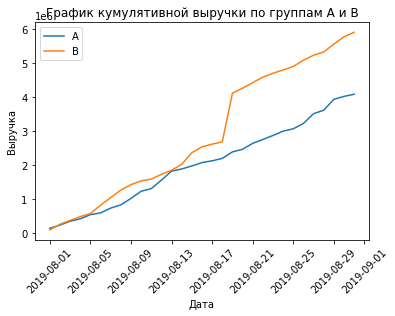

In [12]:
# Создание массива уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# Получение агрегированных кумулятивных по дням данных о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Получение агрегированных кумулятивных по дням данных о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Построение графика выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Построение графика выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Вывод:** группа В лидирует по выручке над группой А практически на всем промежутке времени проведения теста. В середине теста выручка группы В имеет скачок, возможно это влияние аномально больших заказов.

### График кумулятивного среднего чека по группам

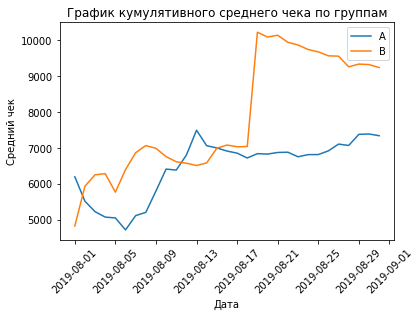

In [13]:
# Построение графика среднего чека по группам (разделение кумулятивной выручки на кумулятивное число заказов)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Вывод:** кумулятивное значение среднего чека группы А стабилизируется возле отметки 7000, в отличии от группы В, где после скачка наблюдается нисходящий тренд. Принимать решение по этой метрике рано, т.к. требуется анализ выбросов, которые могут искажать результаты.

### График относительного изменения кумулятивного среднего чека группы B к группе A

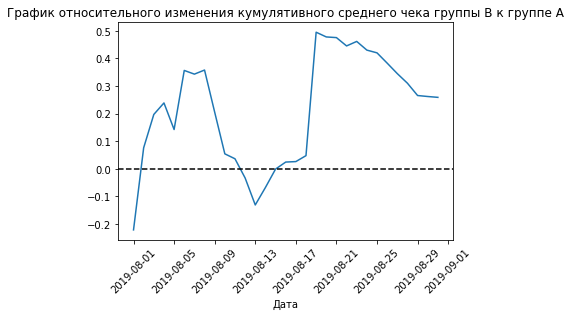

In [14]:
# Консолидация данных в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Построение отношения средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Добавление оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show()

**Вывод:** на графике присутсвуют резкие изменения, возможно в эти даты были совершены аномальные заказы.

### График кумулятивной конверсии по группам

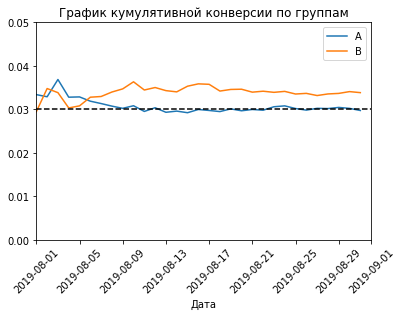

In [15]:
# Расчет кумулятивной конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Отделение данных по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделение данных по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Построение графика
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# Масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.axhline(y=0.03, color='black', linestyle='--')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Вывод:** первое время группа А имела большую конверсию, но постепенно снизилась до уровня 0.03, в то время как группа Б со временем выровнялась и закрепилась выше 0.03.

### График относительного изменения кумулятивной конверсии группы B к группе A

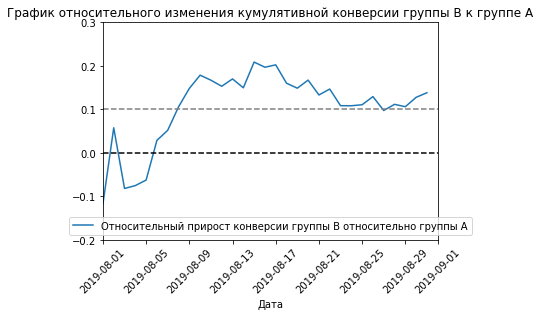

In [16]:
# Объединение таблиц cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Построение графика
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.legend(loc='lower center')
plt.xticks(rotation=45)
plt.show()

**Вывод:** почти с самого начала теста группа В лидирует по конверсии, в середине теста была лучше почти на 20% и в последующем закрепилась выше 10%.

### Точечный график количества заказов по пользователям

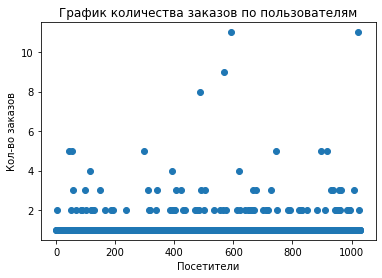

In [17]:
# Группировка заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

# Серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# Построение графика
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.xlabel('Посетители')
plt.show()

**Вывод:** пользователей сделавших больше 2-х заказов очень мало, они вполне могут быть аномальными. А для того, чтобы определить является ли количество заказов равным 2 аномальным, необходимо воспользоваться расчетом перцентилей количества заказов на пользователя.

###  Расчет 95-й и 99-й перцентили количества заказов на пользователя

In [18]:
# Расчет 95 и 99 перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:** Не более 5% пользователей оформляли больше 2-х заказов и всего лишь 1% пользователей заказывали более 4-х раз.
Данные показатели позволяют отсеять аномальных пользователей с количеством заказов больше одного.

### График стоимостей заказов

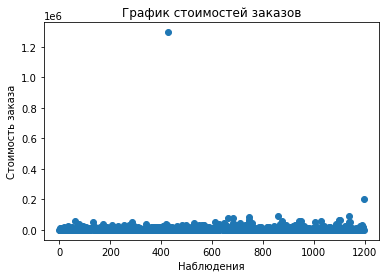

In [19]:
# Определение кол-во наблюдений
x_values = pd.Series(range(0, len(orders['revenue'])))

# Построение графика
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Наблюдения')
plt.show()

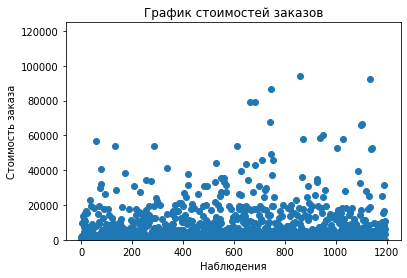

In [20]:
# Построение графика без учета выбросов
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Наблюдения')
plt.ylim(0, 125000)
plt.show()

**Вывод:** заказ стоимость более 1 000 000 руб. выглядит аномально, заказов более 200 000 руб. не так много. Необходимо рассчитать 95-й и 99-й перцентили стоимости заказов.

### Расчет 95-й и 99-й перцентили стоимости заказов

In [21]:
# Расчет 95 и 99 перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** не более, чем у 5% заказов чек дороже 28 000 рублей. И не больше чем у 1% заказов - дороже 58 233 руб. Заказы стоимостью свыше 28 000 руб. можно принять как аномальные.

### Статистическая значимость различий в конверсии между группами по «сырым» данным
Сформулируем гипотезы:
* Нулевая: различий в конверсии между группами нет.
* Альтернативная: различия в конверсии между группами есть.

Проверка статистической значимости с использованием критерия Манна-Уитни. Значение alpha = 0.05.

In [22]:
# Разделение посетителей группы А по дням
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Датафрейм с кумулятивным количеством посетителей по дням в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Разделение посетителей группы В по дням
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Датафрейм с кумулятивным количеством посетителей по дням в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Разделение заказов группы А по дням
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Датафрейм с кумулятивным количеством заказов и выручки по дням в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Разделение заказов группы В по дням
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Датафрейм с кумулятивным количеством заказов и выручки по дням в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Объедение полученных ранее таблиц в один датафрейм
data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**Названия столбцов данных:**
* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
* `rdersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [23]:
# Количество заказов для пользователей группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

# Количество заказов для пользователей группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

# С учетом нулей для пользователей, которые ничего не заказывали.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Расчет статистической значимости различия конверсии с помощью теста Манна-Уитни
print("p-value =", "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Расчет относительного различия в конверсии между группами
print("Относительный прирост конверсии группы В к конверсии группы А =", "{0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост конверсии группы В к конверсии группы А = 13.8%


**Вывод:** p-value меньше 5%, следовательно нулевая гипотеза отвергается. Согласно анализу "сырых" данных в конверсиях между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А = 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
* Нулевая гипотеза: различий в среднем чеке между группами нет.
* Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [24]:
print("p-value =", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный прирост среднего чека группы B =", '{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительный прирост среднего чека группы B = 25.9%


**Вывод:** p-value больше 5%, следовательно статистически значимых отличий в среднем чеке между группами нет. При этом относительное различие среднего чека = 25,9%, которое, вероятнее всего, обусловлено влиянием аномальных выбросов.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным
* Нулевая: различий в конверсии между группами нет.
* Альтернативная: различия в конверсии между группами есть.

In [25]:
# Определение аномальных пользователей с количеством заказов более 1 и стоимостью заказа более 28 000 руб.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Количество аномальных пользователей
abnormalUsers.shape[0]

111

In [26]:
# Датафрейм группы А с исключением аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Датафрейм группы В с исключением аномальных пользователей
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print("p-value =", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост конверсии группы В к конверсии группы А =", "{0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.016
Относительный прирост конверсии группы В к конверсии группы А = 16.8%


**Вывод:** статистическая значимость достигнута, сегмент группы В значительно лучше сегмаента А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
* Нулевая гипотеза: различий в среднем чеке между группами нет.
* Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [27]:
print(
    "p-value =", '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B =", '{0:.1%}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.835
Относительный прирост среднего чека группы B = -0.6%


**Вывод:** p-value больше 5%, следовательно статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека = -0,6%.

## Общий вывод

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались выше 10%.
* График различия среднего чека колеблется, с его помощью были выдвинуты предположения об аномалиях. Сделать из этого графика определённые выводы нельзя.
* Данный тест можно остановить и признать его успешным.